# EDA on given dataset

#Open Pub Application
Let’s assume you are on a vacation in the United Kingdom with your friends. For fun, you decided to go to the Pubs nearby for some drinks. Google Map is down because of some issues.

While searching the internet, you came across https://www.getthedata.com/open-pubs. On this website, you found all the pub locations (Specifically Latitude and Longitude info). In order to impress your friends, you decided to create a web application with the data available in your hand.



In [5]:
# import neseccery libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium


In [6]:
df = pd.read_csv('/content/open_pubs.csv', names=['fsa_id','name','address','postcode','easting','northing','latitude','longitude','local_authority'])

In [7]:
df.head(20)

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
5,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
7,122,Caffeine Lounge,"14 Borehamgate Shopping Precinct, King Street,...",CO10 2ED,587527,241247,52.037903,0.732687,Babergh
8,137,Carriers Arms,"Heath Road, East Bergholt, COLCHESTER",CO7 6RA,622675,-5527598,\N,\N,Babergh
9,152,Chestnut Tree Farm,"3 Donald Mackintosh Way, Pinewood, IPSWICH",IP8 3LQ,612862,242887,52.043494,1.102543,Babergh


In [8]:
# Printing Total Numbers of Rows and Columns

print(df.shape)

# Printing the Dataset Information

print(df.info())

(51331, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB
None


In [9]:
# Printing Null Values

df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [10]:
# Printing Duplicated Values

df.duplicated().sum()

0

In [11]:
df.latitude.value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.369771      1
53.390799      1
53.371238      1
53.361078      1
53.076638      1
Name: latitude, Length: 46810, dtype: int64

In [13]:
import numpy as np
# Replacing \N values to nan

df.replace('\\N', np.nan, inplace=True)

In [14]:
df.isnull().sum()

fsa_id               0
name                 0
address              0
postcode             0
easting              0
northing             0
latitude           767
longitude          767
local_authority      0
dtype: int64

In [15]:
# Dropping nan Values

df.dropna(inplace=True)
df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [16]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
5,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh


In [17]:
df.shape

(50564, 9)

In [18]:
# Converting categorical values to numerical values

df.latitude = df.latitude.astype(float)
df.longitude = df.longitude.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fsa_id           50564 non-null  int64  
 1   name             50564 non-null  object 
 2   address          50564 non-null  object 
 3   postcode         50564 non-null  object 
 4   easting          50564 non-null  int64  
 5   northing         50564 non-null  int64  
 6   latitude         50564 non-null  float64
 7   longitude        50564 non-null  float64
 8   local_authority  50564 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


In [19]:
df.local_authority.value_counts().head(10)


County Durham        680
Leeds                611
Cornwall             557
Wiltshire            544
Kirklees             524
City of Edinburgh    506
Birmingham           494
Buckinghamshire      485
Bradford             478
Northumberland       446
Name: local_authority, dtype: int64

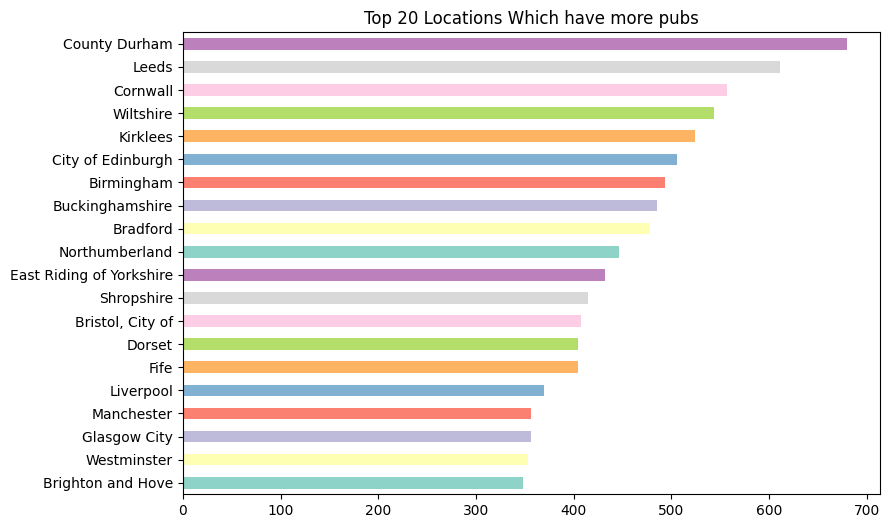

In [21]:
colors = plt.cm.Set3(range(10))
df.local_authority.value_counts().head(20).sort_values().plot(kind='barh', color=colors , figsize=(9,6), title="Top 20 Locations Which have more pubs")
plt.savefig('pubs_20_location.png', dpi=300, bbox_inches='tight')
plt.show()

# visualization part

In [22]:
# Create a map object with a starting location and zoom level

map = folium.Map(location=[51.970379, 0.979340], zoom_start=12)

# Add a marker to the map

folium.Marker(location=[51.970379, 0.979340], tooltip='Open Pub' , popup='Anchor Inn').add_to(map)

# Anchor Inn

# Display the map
map

In [23]:
df.to_csv("new_cleaned.csv", index=False)


In [24]:
df1 = pd.read_csv('/content/new_cleaned.csv')
df1.head()


,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
4,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
